# CME 193 - Lecture 5 - SciPy

SciPy is a library built on top of NumPy that contains functionality common in scientific computing. Here is a list of subpackages it contains:

- cluster:	Clustering algorithms
- constants:	Physical and mathematical constants
- fftpack:	Fast Fourier Transform routines
- **integrate:	Integration and ordinary differential equation solvers**
- interpolate:	Interpolation and smoothing splines
- io:	Input and Output
- **linalg:	Linear algebra**
- ndimage:	N-dimensional image processing
- odr:	Orthogonal distance regression
- **optimize:	Optimization and root-finding routines**
- signal:	Signal processing
- sparse:	Sparse matrices and associated routines
- spatial:	Spatial data structures and algorithms
- special:	Special functions
- stats:	Statistical distributions and functions

Today we'll "tour" the ones in **bold**.

# Solving linear systems of equations
By far the most common operation in scientific computing is solving a system of equations, specified by $Ax = b$. For example:

$$ 
\begin{align}
3x + 2y + 5z &=  2 \\
x - y + z &= 4 \\
6y  + z &= -1
\end{align}
$$

In [1]:
import numpy as np
import scipy.linalg as linalg

In [2]:
a = np.array([[3, 2, 5], [1, -1, 1], [0, 5, 1]])

In [3]:
b = np.array([2, 4, -1])

In [4]:
x = linalg.solve(a, b)
x

array([14.6,  1.6, -9. ])

In [5]:
a @ x

array([ 2.,  4., -1.])

In [6]:
# A matrix with more rows than columns (more equations than unknowns)
a = np.array([[1, 2, 1],
              [1, 1, 2],
              [2, 1, 1],
              [1, 1, 1]])
b = np.array([4, 3, 5, 4])

In [7]:
linalg.solve(a, b)

ValueError: Input a needs to be a square matrix.

In [8]:
linalg.lstsq(a, b)  # Finds the x that minimizes ||Ax - b||

(array([2.05263158, 1.05263158, 0.05263158]),
 0.8421052631578952,
 3,
 array([4.35889894, 1.        , 1.        ]))

In [9]:
x = linalg.lstsq(a, b)[0]
a @ x  # this is close to b

array([4.21052632, 3.21052632, 5.21052632, 3.15789474])

In [10]:
b

array([4, 3, 5, 4])

In [11]:
linalg.norm(a @ x - b)**2

0.842105263157895

# Optimization using `scipy.optimize`

Often in scientific computing you'll want to find the minimum of a function. For example, consider the following function.

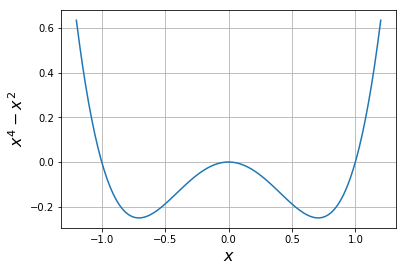

In [13]:
import matplotlib.pyplot as plt

def f(x):
    return x**4 - x**2

x = np.linspace(-1.2, 1.2, 100)
y = f(x)

plt.plot(x, y)
plt.grid()
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$x^4 - x^2$", fontsize=16)
plt.show()

In [14]:
import scipy.optimize as opt

The simplest way to minimize a function is using [`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

In [24]:
result = opt.minimize(f, x0=0, method='Nelder-Mead')
result

 final_simplex: (array([[0.707125 ],
       [0.7070625]]), array([-0.25, -0.25]))
           fun: -0.2499999993361326
       message: 'Optimization terminated successfully.'
          nfev: 48
           nit: 24
        status: 0
       success: True
             x: array([0.707125])

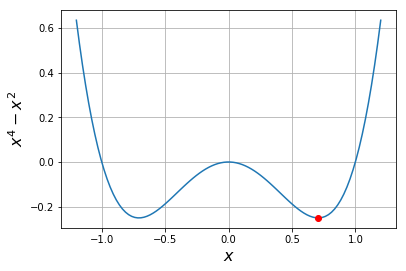

In [25]:
plt.plot(x, y)
plt.plot(result.x, f(result.x), "ro")

plt.grid()
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$x^4 - x^2$", fontsize=16)
plt.show()

In [26]:
def g(z):
    x, y = z
    return np.sin(x + 2) * np.sin(y + 2)

result = opt.minimize(g, x0=np.array([0, 1]))
result

      fun: -0.9999999999743093
 hess_inv: array([[ 1.03270707, -0.01102124],
       [-0.01102124,  1.0037377 ]])
      jac: array([ 6.79492950e-06, -2.29477882e-06])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 6
     njev: 8
   status: 0
  success: True
        x: array([-0.42919689,  2.71238668])

In [28]:
# def f(x):
#     return x ** 2 + x ** 4

f = lambda x: x **2 + x ** 4
opt.minimize(f, x0=0.5)

      fun: 6.326558280167952e-17
 hess_inv: array([[0.49999901]])
      jac: array([-1.00677177e-09])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-7.95396648e-09])

In [29]:
opt.minimize(lambda x: x ** 2 + x ** 4, x0=0.5)

      fun: 6.326558280167952e-17
 hess_inv: array([[0.49999901]])
      jac: array([-1.00677177e-09])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-7.95396648e-09])

In [30]:
g = lambda x, y: x ** 2 + y * x ** 4

In [31]:
g(10, 5)

50100

## Linear programming
A very common case is linear programming (LP). These are optimization problems that can be written in the form

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & c^{T}x  \\
\text{subject to} \;\; & A_{ub}x \leq b_{ub} \\
& A_{eq}x = b_{eq}
\end{split}
\end{equation}
$$

Here, we are finding the vector $x$ that minimizes the dot product $c^T x$, where $c$ is some fixed vector, out of all $x$ that satisfy $A_{ub}x \leq b_{ub}$ and $A_{eq}x = b_{eq}$, where $A_{ub}$ and $A_{eq}$ are matrices and $b_{ub}$ and $b_{eq}$ are vectors.

## Exercise 6
Using Google and reading documentation are important parts of programming. `scipy.optimize` comes with specialized functions for solving linear programming problems.

Figure out how to solve LPs using `scipy.optimize`, and solve the following LP:
$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & x_1 + 2 x_2  \\
\text{subject to} \;\; & x_1 \leq 1 \\
& 5 x_1 + x_2 \geq 0
\end{split}
\end{equation}
$$

Note that the problem is equivalent to

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & c^T x  \\
\text{subject to} \;\; & A_{ub}x \leq b_{ub} \\
& A_{eq}x = b_{eq}
\end{split}
\end{equation}
$$
where
$$
c = \begin{pmatrix} 1 \\ 2 \end{pmatrix} \qquad 
A_{ub} = \begin{pmatrix} 1 & 0 \\ -5 & -1 \end{pmatrix}, \qquad
b_{ub} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \qquad
A_{eq} = 0, \qquad
b_{eq} = 0.
$$

We can see this because 
$$
 \begin{pmatrix} 1 & 0 \\ -5 & -1 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} = \begin{pmatrix} x_1 \\ -5x_1 - x_2 \end{pmatrix} 
$$

In [33]:
# YOUR CODE HERE
c = np.array([1, 2])
A_ub = np.array([[1, 0], [-5, -1]])
b_ub = np.array([1, 0])
opt.linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=(None, None))

     con: array([], dtype=float64)
     fun: -9.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([ 1., -5.])

## Curve fitting

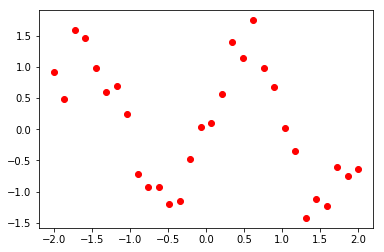

In [35]:
def f(x, a, b):
    return a * np.sin(b * x)

x = np.linspace(-2, 2, 30)
y = f(x, 1.3, 3) + 0.3 * np.random.randn(30)
plt.plot(x, y, 'ro')
plt.show()

In [36]:
(a, b), cov = opt.curve_fit(f, x, y)
a, b

(1.2708917080168607, 2.9696448413642798)

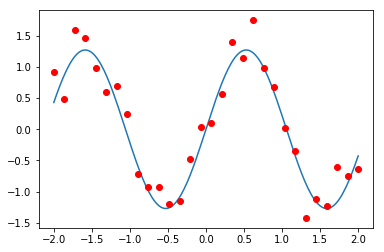

In [38]:
x_fine = np.linspace(-2, 2, 200)
plt.plot(x_fine, f(x_fine, a, b))
plt.plot(x, y, 'ro')
plt.show()

# Numerical integration using `scipy.integrate`

In [3]:
import scipy.integrate as integrate
import numpy as np

Here's how to compute $$
\int_0^\pi \sin(x) \,e^{-x} \,dx 
$$

In [4]:
def f(x):
    return np.sin(x) * np.exp(-x)

In [5]:
f(1.5)

0.22257121610821853

In [6]:
integrate.quad(f, 0, np.pi)

(0.5216069591318861, 5.791000558329331e-15)

In [7]:
def f_antiderivative(x):
    return -np.exp(-x) * (np.sin(x) + np.cos(x)) / 2

In [8]:
f_antiderivative(np.pi) - f_antiderivative(0)

0.5216069591318861

In [9]:
integrate.quad(f, 0, np.inf)

(0.5000000000000002, 1.4875911973447031e-08)

In [11]:
f_antiderivative(10000) - f_antiderivative(0)

0.5

## Physical simulation
SciPy can solve ODEs (ordinary differential equations). Let's simulate a throwing a ball in two dimensions. The ball is described as a function of time by four functions: $x(t), y(t), v_x(t), v_y(t)$, which are governed by the ODE system:

$$
    \frac{dx}{dt} = v_x, \qquad
    \frac{dy}{dt} = v_y, \qquad
    \frac{dv_x}{dt} = 0, \qquad
    \frac{dv_y}{dt} = -g.
$$

We can think of this in vectorized form as:

$$
    \frac{d}{dt} \begin{pmatrix} x \\ y \\ v_x \\ v_y \end{pmatrix} = \begin{pmatrix} v_x \\ v_y \\ 0 \\ -g \end{pmatrix}
$$

In [12]:
def dzdt(z, t):
    x, y, vx, vy = z
    g = 1
    return np.array([vx, vy, 0, -g])

In [13]:
np.linspace(0, 50, 20)

array([ 0.        ,  2.63157895,  5.26315789,  7.89473684, 10.52631579,
       13.15789474, 15.78947368, 18.42105263, 21.05263158, 23.68421053,
       26.31578947, 28.94736842, 31.57894737, 34.21052632, 36.84210526,
       39.47368421, 42.10526316, 44.73684211, 47.36842105, 50.        ])

In [16]:
import matplotlib.pyplot as plt

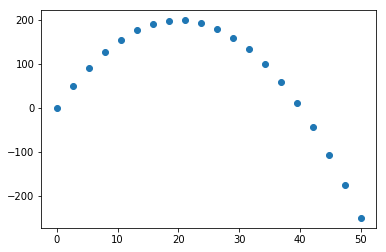

In [17]:
x, y = 0, 0
vx, vy = 1, 20
z = np.array([x, y, vx, vy])
t = np.linspace(0, 50, 20)

result = integrate.odeint(dzdt, z, t)

plt.scatter(result[:, 0], result[:, 1])
plt.show()

## Exercise 7
We can add drag with the following slight modification to the ODE, which adds a force with direction opposing the current velocity, and with magnitude proportional to the velocity squared.
    
$$
    \frac{d}{dt} \begin{pmatrix} x \\ y \\ v_x \\ v_y \end{pmatrix} = \begin{pmatrix} v_x \\ v_y \\ -\alpha v_x \sqrt{v_x^2 + v_y^2} \\ -g -\alpha v_y \sqrt{v_x^2 + v_y^2} \end{pmatrix}
$$

Implement this with $\alpha = 0.001$, plot the resulting trajectory, and compare to the dragless case.

In [27]:
def dzdt_drag(z, t):
    x, y, vx, vy = z
    g = 1
    alpha = 0.01
    v = np.sqrt(vx**2 + vy**2)
    return np.array([vx, vy, -alpha * vx * v, -g - alpha * vy * v])

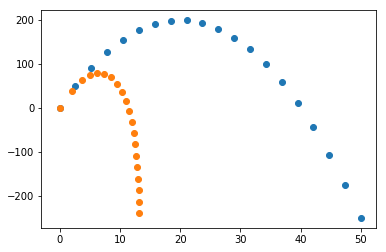

In [28]:
result_drag = integrate.odeint(dzdt_drag, z, t)

plt.scatter(result[:, 0], result[:, 1])
plt.scatter(result_drag[:, 0], result_drag[:, 1])
plt.show()